# Data Mining and Warehousing Project - Jeffery Martin, Jonathan Pitter, Matthieu Thomas 

Useful Links: https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python


https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
#imports

C:\Users\jd_ri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [149]:
df = pd.read_csv("C:/Users/jd_ri/Desktop/Data Mining project/winemag-data-130k-v2.csv",nrows=30000)

In [3]:
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Letting uncessary fields go

In [4]:
df2 = df.drop(['taster_name','taster_twitter_handle','region_1','region_2','designation'],axis=1)

In [5]:
df2.head(10)

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [6]:
df2.describe()

,points,price
count,30000.00000,27852.000000
mean,88.37660,34.928048
std,3.00747,40.305503
min,80.00000,4.000000
25%,86.00000,17.000000
50%,88.00000,25.000000
75%,91.00000,42.000000
max,100.00000,2500.000000


In [7]:
df2.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
dtype: object

### Looking at the count for price vs points signs of missing data can already be seen.

### <i>Looking for pesky outliers and missing data... </i>

<p>Before I started to plot graphs I decided to check for missing data.</p>

In [8]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country          15
description       0
points            0
price          2148
province         15
title             0
variety           0
winery            0
dtype: int64

In [71]:
df2.dropna(axis='rows',inplace=True)

## Looking at the frequency of occurence for each wine type

In [72]:
df2['variety'].value_counts()

Pinot Noir                          2898
Chardonnay                          2463
Cabernet Sauvignon                  2167
Red Blend                           1925
Bordeaux-style Red Blend            1232
Riesling                            1176
Sauvignon Blanc                     1156
Syrah                                919
Merlot                               696
Rosé                                 675
Zinfandel                            646
Malbec                               622
Portuguese Red                       530
Nebbiolo                             524
Sangiovese                           519
White Blend                          488
Sparkling Blend                      485
Tempranillo                          396
Rhône-style Red Blend                338
Cabernet Franc                       313
Pinot Gris                           309
Champagne Blend                      294
Grüner Veltliner                     293
Portuguese White                     240
Viognier        

In [73]:
filtered = df2.groupby('variety').filter(lambda x: len(x) >= 1000) #taking only the highest occuring to reduce size and keeping distribution in mind.

In [74]:
filtered.head(10)

,country,description,points,price,province,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,87,12.0,California,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
15,Germany,Zesty orange peels and apple notes abound in t...,87,24.0,Mosel,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
20,US,Ripe aromas of dark berries mingle with ample ...,87,23.0,Virginia,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont
21,US,"A sleek mix of tart berry, stem and herb, alon...",87,20.0,Oregon,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat
25,US,Oak and earth intermingle around robust aromas...,87,69.0,California,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
28,Italy,"Aromas suggest mature berry, scorched earth, a...",87,17.0,Sicily & Sardinia,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo


In [75]:
filtered['price'].fillna(filtered['price'].mean(), inplace=True)#filling in the mean price for missing records

C:\Users\jd_ri\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [76]:
filtered['variety'].value_counts()

Pinot Noir                  2898
Chardonnay                  2463
Cabernet Sauvignon          2167
Red Blend                   1925
Bordeaux-style Red Blend    1232
Riesling                    1176
Sauvignon Blanc             1156
Name: variety, dtype: int64

In [77]:
filtered.apply(lambda x: sum(x.isnull()),axis=0)

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

In [78]:
filtered.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
dtype: object

In [79]:
filtered.dropna(axis='rows',inplace=True)# dropping the rest of missing stuff

C:\Users\jd_ri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
# filtered = filtered[~filtered['variety'].isin(['Pinot Noir','Chardonnay','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Syrah'])]

In [81]:
# filtered.apply(lambda x: sum(x.isnull()),axis=0)

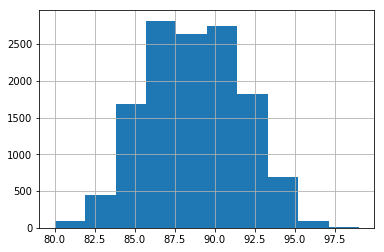

In [82]:
filtered['points'].hist(bins=10)

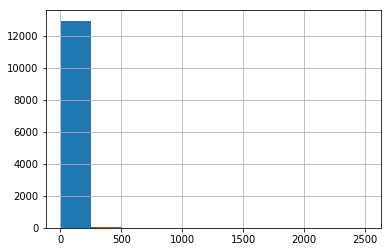

In [83]:
filtered['price'].hist(bins=10)

C:\Users\jd_ri\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


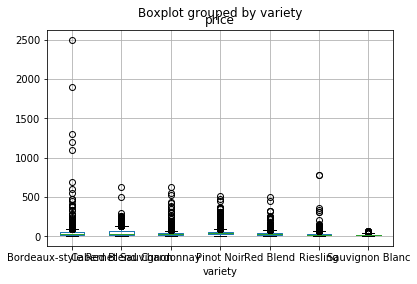

In [84]:
filtered.boxplot(column='price', by='variety')

In [85]:
#Making a new column that is encoded version of variety
filtered['category_id'] = filtered['variety'].factorize()[0]
category_id_df = filtered[['variety', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'variety']].values)
filtered.head()

C:\Users\jd_ri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,description,points,price,province,title,variety,winery,category_id
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,1
10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2
12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2
14,US,Building on 150 years and six generations of w...,87,12.0,California,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,3


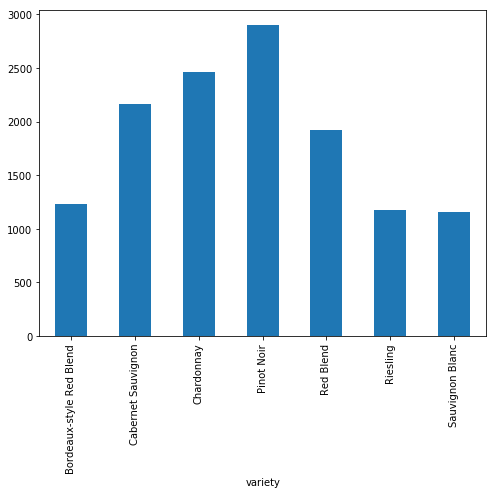

In [86]:
#plotting the frequencies
fig = plt.figure(figsize=(8,6))
filtered.groupby('variety').description.count().plot.bar(ylim=0)
plt.show() 

## Getting important words using term frequncy inverse document frequency

In [87]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), stop_words='english')

In [88]:
features = tfidf.fit_transform(filtered.description).toarray()
labels = filtered.category_id
features.shape

(13017, 12983)

### Testing out a prediction with naive bayes

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(filtered['description'], filtered['variety'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [90]:
print(clf.predict(count_vect.transform(["This wine from the Geneseo district offers aromas of sour plums and just enough cigar box to tempt the nose. The flavors are a bit flat at first, then the acidity and tension of sour cherries emerges in the midpalate, bolstered by some black licorice."])))

['Pinot Noir']


### Looking for the best performing algorithms

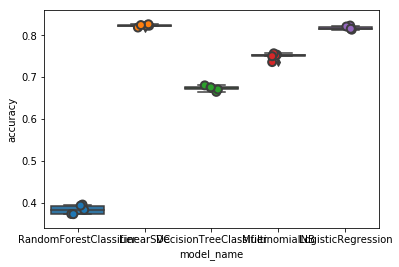

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    DecisionTreeClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [92]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.673582
LinearSVC                 0.822925
LogisticRegression        0.817622
MultinomialNB             0.749788
RandomForestClassifier    0.384490
Name: accuracy, dtype: float64

### Showing the confusion matrix for the Support Vector Machine algorithm

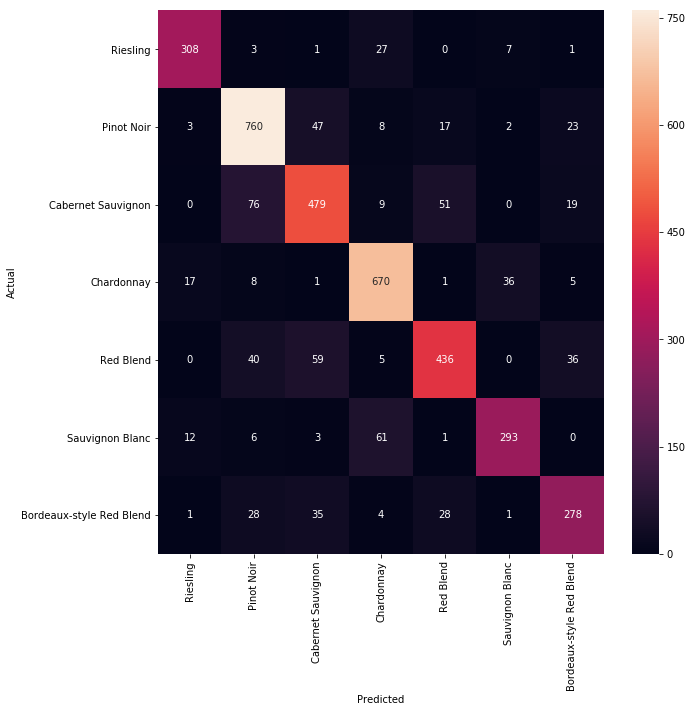

In [93]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, filtered.index, test_size=0.30, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.variety.values, yticklabels=category_id_df.variety.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [94]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=filtered['variety'].unique()))

                          precision    recall  f1-score   support

                Riesling       0.90      0.89      0.90       347
              Pinot Noir       0.83      0.88      0.85       860
      Cabernet Sauvignon       0.77      0.76      0.76       634
              Chardonnay       0.85      0.91      0.88       738
               Red Blend       0.82      0.76      0.79       576
         Sauvignon Blanc       0.86      0.78      0.82       376
Bordeaux-style Red Blend       0.77      0.74      0.75       375

             avg / total       0.83      0.83      0.82      3906



In [95]:
from sklearn import datasets, linear_model, metrics

# DECISION TREE ALGORITHM



Data Slicing


In [150]:
print ("Dataset Length:: ", len(df2))
print ("Dataset Shape:: ", df2.shape)

Dataset Lenght::  27840
Dataset Shape::  (27840, 8)


# Encode Table into Numbers

In [151]:
for column in df2.columns:
    if df2[column].dtype == type(object):
        le = LabelEncoder()
        df2[column] = le.fit_transform(df2[column])

In [152]:
df2.head()

,country,description,points,price,province,title,variety,winery
1,29,22912,87,15.0,71,20318,299,7080
2,38,17317,87,14.0,194,20432,288,7120
3,38,13849,87,13.0,153,23094,321,7939
4,38,12704,87,65.0,194,23546,292,8078
5,35,4910,87,15.0,188,23726,390,8123


In [153]:
X = df2.values[:, 1:7]
Y = df2.values[:,0]

In [154]:
print(X)

[[  2.29120000e+04   8.70000000e+01   1.50000000e+01   7.10000000e+01
    2.03180000e+04   2.99000000e+02]
 [  1.73170000e+04   8.70000000e+01   1.40000000e+01   1.94000000e+02
    2.04320000e+04   2.88000000e+02]
 [  1.38490000e+04   8.70000000e+01   1.30000000e+01   1.53000000e+02
    2.30940000e+04   3.21000000e+02]
 ..., 
 [  1.15970000e+04   9.10000000e+01   5.40000000e+01   3.80000000e+01
    3.54100000e+03   3.17000000e+02]
 [  6.99600000e+03   9.10000000e+01   2.30000000e+01   3.80000000e+01
    2.23830000e+04   2.76000000e+02]
 [  2.25920000e+04   9.10000000e+01   7.50000000e+01   3.80000000e+01
    2.25910000e+04   4.90000000e+01]]


In [155]:
print(Y)

[ 29.  38.  38. ...,  38.  38.  38.]


In [156]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.5, random_state = 100)

In [157]:
df2.dtypes

country          int64
description      int64
points           int64
price          float64
province         int64
title            int64
variety          int64
winery           int64
dtype: object

# *Criterion to determine the quality of split*

# Decision Tree Classifier with criterion gini index


In [114]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Display Decision Tree

In [115]:
with open("Wine_Tree.txt", "w") as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

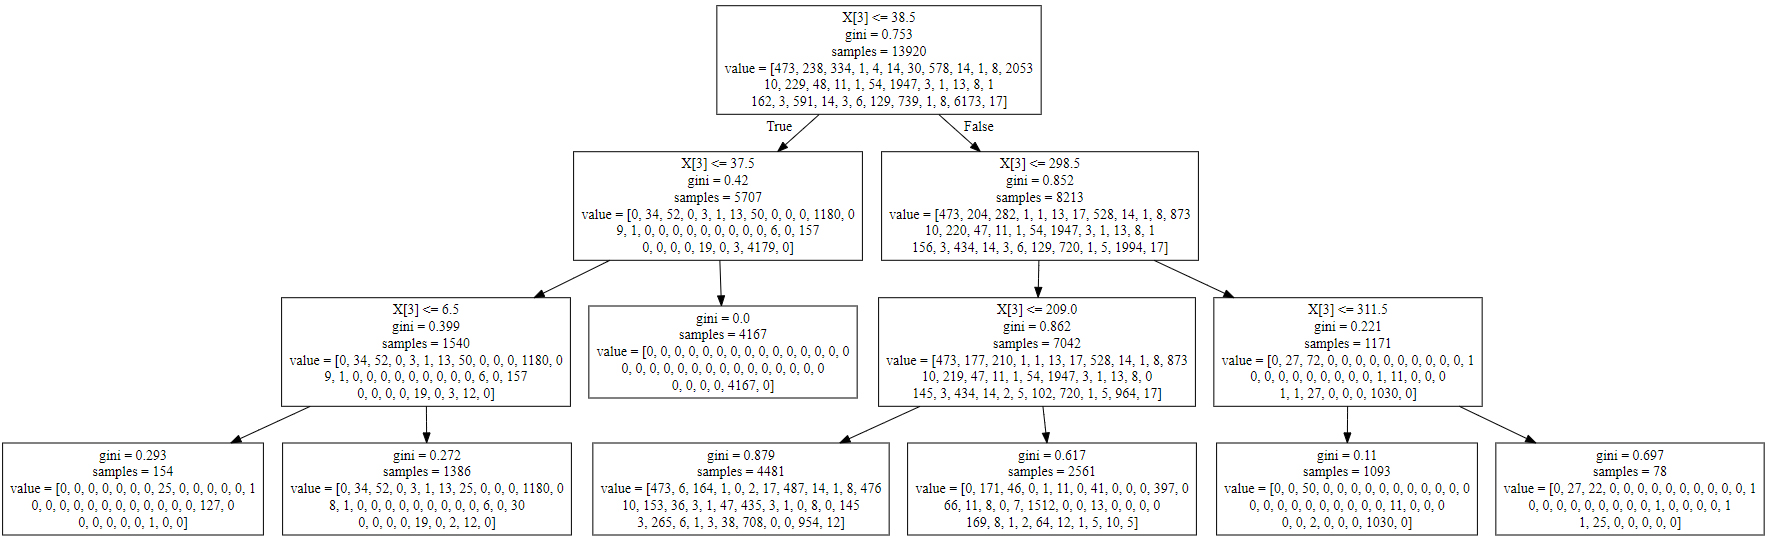

In [119]:
from IPython.display import Image
Image("Wine_Tree.jpg")

# Decision Tree Classifier with criterion information gain

In [120]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Display Decision Tree

In [132]:
with open("Wine_Tree2.txt", "w") as f:
    f = tree.export_graphviz(clf_entropy, out_file=f)

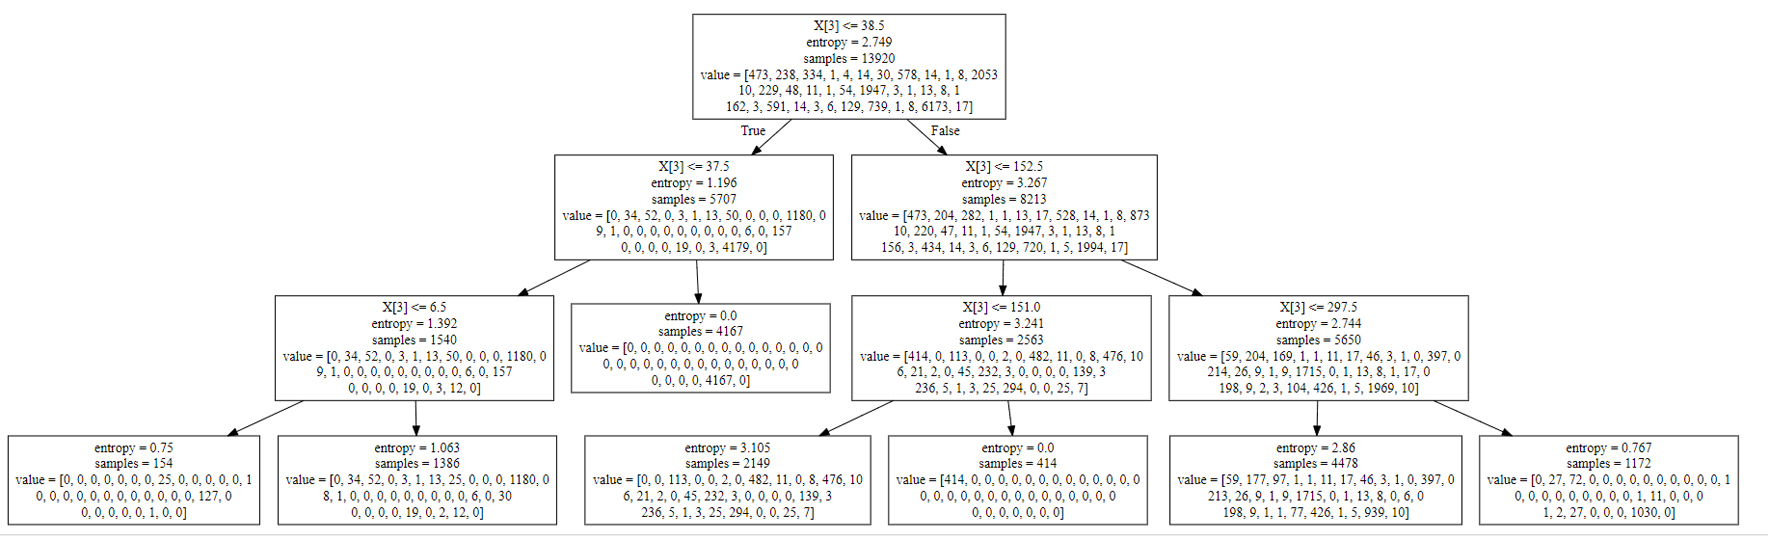

In [123]:
from IPython.display import Image
Image("./Wine_Tree2.jpg")

# Prediction

In [158]:
clf_gini.predict([[22912,87,15.0,71,20318,299]])


array([ 38.])

In [159]:
y_pred = clf_gini.predict(X_test)
y_pred

array([ 20.,  20.,  38., ...,  13.,  38.,  38.])

In [160]:
clf_entropy.predict([[22912,87,15.0,71,20318,299]])

array([ 8.])

In [161]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([ 20.,  20.,   0., ...,  13.,  20.,  20.])

# Accuracy for Decision Tree classifier with criterion as gini index

In [162]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  64.8132183908


# Accuracy for Decision Tree classifier with criterion as information gain


In [163]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  64.9856321839


# Linear Regression

The scatter looks price, winery and province plotted against price 

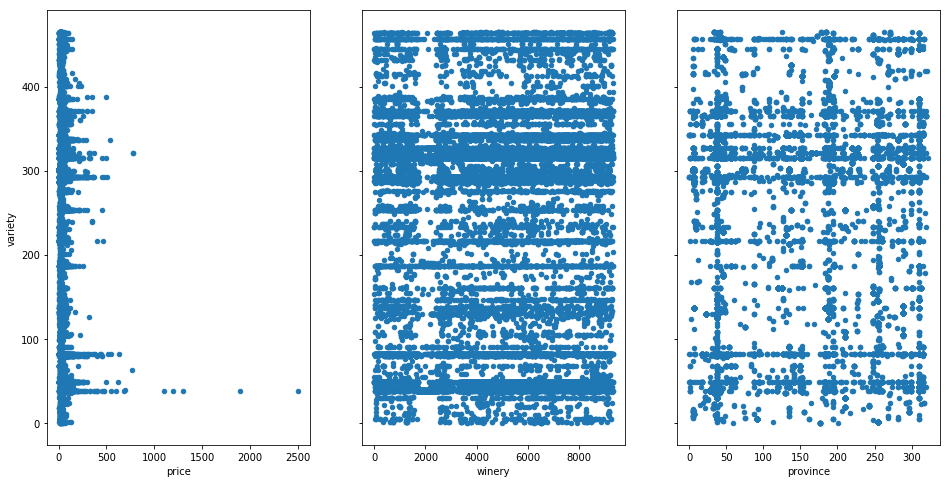

In [169]:
fig, axs = plt.subplots(1, 3, sharey=True)
df2.plot(kind='scatter', x='price', y='variety', ax=axs[0], figsize=(16, 8))
df2.plot(kind='scatter', x='winery', y='variety', ax=axs[1],figsize=(16, 8))
df2.plot(kind='scatter', x='province', y='variety', ax=axs[2],figsize=(16, 8))

# estimate the model coefficients for the Wine data

In [197]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='price ~ winery', data=df2).fit()

# print the coefficients
lm.params

Intercept    36.236149
winery       -0.000272
dtype: float64

In [174]:
X_new = pd.DataFrame({'price': [50]})
X_new.head

<bound method NDFrame.head of    price
0     50>

In [179]:
X_new = pd.DataFrame({'price': [df2.price.min(), df2.price.max()]})
X_new.head

<bound method NDFrame.head of     price
0     4.0
1  2500.0>

In [193]:
x = df2['variety'].values.reshape(27840 , 1)
y = df2['price'].values.reshape(27840 , 1)

# Linear Relationship


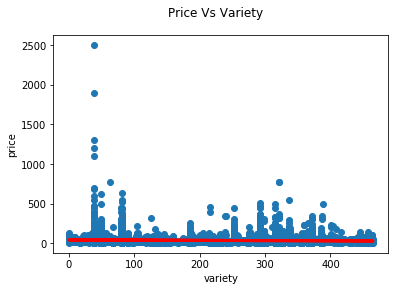

In [196]:
from sklearn.linear_model import LinearRegression 
regr = LinearRegression(fit_intercept=True)
regr.fit(x, y)


fig = plt.figure()
plt.scatter(x, y,)
plt.plot(x, regr.predict(x), color='red', linewidth=3)
fig.suptitle('Price Vs Variety')
plt.xlabel('variety')
plt.ylabel('price')
plt.show()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)

In [206]:
reg = linear_model.LinearRegression()

In [207]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
# regression coefficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[  2.36399874e-19   1.38361544e-14   1.00000000e+00   2.76459696e-16
   -1.21430643e-17  -2.00631612e-16]]


In [209]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 1.0


# Plot for residual error

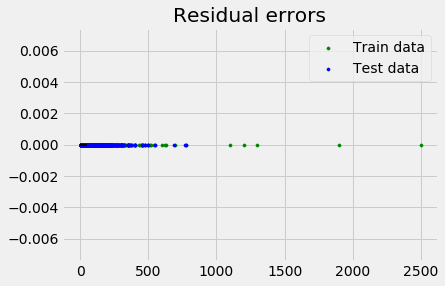

In [210]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## function to show plot
plt.show()

# Vizualize initial data 3D

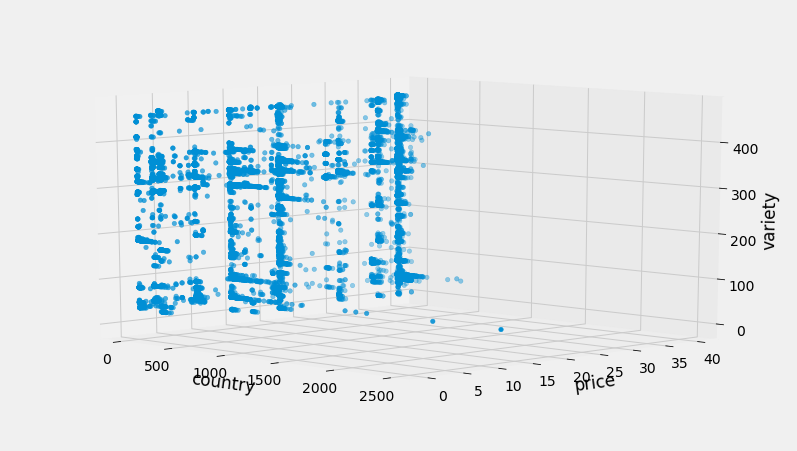

In [219]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df2['price'], ys=df2['country'], zs=df2['variety'])

ax.set_ylabel('price'); ax.set_xlabel('country'); ax.set_zlabel('variety')
ax.view_init(10, -45)